# A QUESTÃO DO NEGÓCIO


A empresa Walmart nos contratou para realizar um estudo sobre o faturamento de algumas de suas lojas nos EUA e determinar qual delas seria a mais adequada para receber um investimento e ser ampliada.

Utilizando o dataset disponibilizado, iremos aplicar os conceitos aprendidos até o momento em um projeto prático, que busca desenvolver nosso pensamento analítico, insights e tomada de decisões.

# O ENTENDIMENTO DO NEGÓCIO


A empresa Walmart Inc., é uma multinacional estadunidense de lojas de departamento. Ela foi fundada em 1962 por Sam Walton. 

Walmart é a maior loja de varejo dos Estados Unidos e possui mais de 11.000 lojas em 27 países diferentes. 

No ano de 2021, obteve um lucro de $13,51 Bilhões.

# A COLETA DOS DADOS:




O Dataset apresenta as vendas semanais de 45 lojas varejistas da rede Walmart espalhadas pelos EUA e também algumas métricas econômicas e meteorológicas, de 05/02/2010 até 01/11/2012.

Dataset: https://www.kaggle.com/datasets/yasserh/walmart-dataset


**Breve descrição das features disponíveis no dataset:**

Store - Número da loja;

Date - Semana da venda;

Weekly_Sales - Venda naquela semana;

Holiday_Flag - Indicação se é feriado naquela semana;

Temperature - Temperatura do dia em °F;

Fuel_Price - Preço do combustível na região da loja;

CPI - Índice de de preços ao consumidor;

Unemployment - Taxa de desemprego.

OBS: Durante o ano o Walmart realiza vários eventos promocionais de descontos (Super Bowl, Dia do Trabalho, Dia de Ação de Graças e Natal), essas semanas são destacadas no dataset através do 'Holiday_Flag' e possuem um peso maior

# DESENVOLVIMENTO

## Importando bibliotecas necessárias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

## Conhecendo o dataset disponibilizado

In [2]:
df = pd.read_csv("Walmart.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


## Tratamento dos dados

### Verificando se possuem valores nulos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


> Verifica-se que os dados não possuem valores nulos

### Verificando se todas as lojas possuem o mesmo número de registos

In [5]:
df['Store'].value_counts()

1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: Store, dtype: int64

> Verifica-se que todas as lojas possuem o mesmo número de registros.

### Convertendo a coluna 'Temperature' para °C

In [6]:
df['Temperature'] = df.Temperature.apply(lambda x : (x - 32) * (5 / 9))
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,5.727778,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,3.616667,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,4.405556,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,8.127778,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,8.055556,2.625,211.350143,8.106


### Limitando as casas decimais do df

In [7]:
df = df.round(decimals=2)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,5.73,2.57,211.10,8.11
1,1,12-02-2010,1641957.44,1,3.62,2.55,211.24,8.11
2,1,19-02-2010,1611968.17,0,4.41,2.51,211.29,8.11
3,1,26-02-2010,1409727.59,0,8.13,2.56,211.32,8.11
4,1,05-03-2010,1554806.68,0,8.06,2.62,211.35,8.11


## Exploração de Dados:

### Média das vendas semanais por loja

In [8]:
df_media_semanal = pd.DataFrame(df.groupby('Store')['Weekly_Sales'].describe())
df_media_semanal['median'] = pd.DataFrame(df.groupby('Store')['Weekly_Sales'].median())
df_media_semanal = df_media_semanal.round(decimals=2)
df_media_semanal.head()

,count,mean,std,min,25%,50%,75%,max,median
Store,,,,,,,,,
1,143.0,1555264.40,155980.77,1316899.31,1458104.69,1534849.64,1614892.03,2387950.20,1534849.64
2,143.0,1925751.34,237683.69,1650394.44,1803500.64,1879107.31,1956926.53,3436007.68,1879107.31
3,143.0,402704.44,46319.63,339597.38,367860.60,395107.35,420759.35,605990.41,395107.35
4,143.0,2094712.96,266201.44,1762539.30,1929611.49,2073951.38,2175038.91,3676388.98,2073951.38
5,143.0,318011.81,37737.97,260636.71,294696.00,310338.17,329860.58,507900.07,310338.17


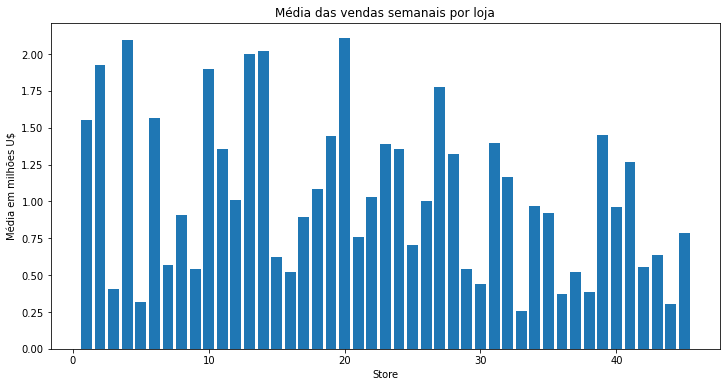

In [31]:
plt.figure(figsize=[12,6])
plt.title('Média das vendas semanais por loja')
plt.bar(df_media_semanal.index, df_media_semanal['mean'] / 1000000)
plt.xlabel('Store')
plt.ylabel('Média em milhões U$')
plt.show()

## Análise dos dados


### Pergunta a serem analisadas: 

> **Quanto os feriados estão interferindo no valor de vendas no ano?**

*Hípotese*: feriados promovem mais vendas, porém podem não ser coerentes com a venda média da loja, dessa forma atribuiríamos boa avaliação para uma loja com rendimento médio abaixo do desejado.<br>

> **Qual é a correlação no valor de vendas semanal para cada loja?**

*Hipótese*: para cada região (loja) haverá uma feature que melhor se relaciona com o valor das vendas.

- Formas de analisar / etapas:
  - Separar o DF por loja e verificar a correlação entre as features,
  - Comparar as features que ficaram melhor no ranking entre todas as lojas
<br>

> **Qual é a tendência de desemprego na região da loja?**

*Hípotese*: *Região cuja taxa de desemprego mostra tendência de aumento, pode não ser um bom local para instalação de novas lojas.

---

### Verificando o somatório de vendas entre as semanas com e sem evento

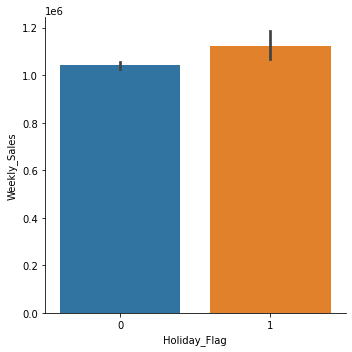

In [16]:
# Comparação entre o somatório dos feriados X somatatório outros dias por loja

sns.catplot(x = 'Holiday_Flag', y = 'Weekly_Sales', kind = 'bar', data = df)
plt.show()

Confirma a ideia de que mesmo sendo apenas poucas semanas no ano, as vendas nas semanas de feriado superam o somatório de todo o resto do ano, porém a diferença não é muito relevante.
<br><br>
Resta verificar se elas causam distorção na distribuição das vendas ao longo do ano.

#### Distribuição e crescimento de vendas ao longo dos anos para cada loja

Criando colunas Mês a Ano separadas

In [10]:
df['Month']=df['Date'].apply(lambda x: str(x).split(sep="-")[1])
df['Year']=df['Date'].apply(lambda x: str(x).split(sep="-")[2])

Tabela com as vendas agrupadas por lojas, meses e anos.

In [32]:
df_month = df.groupby(['Store','Month','Year']).sum().reset_index()[['Store','Month','Year','Weekly_Sales']]
df_month.rename(columns = {'Weekly_Sales':'Sales'},inplace=True)
df_month.sort_values(['Store','Year','Month'],inplace=True)
df_month

,Store,Month,Year,Sales
2,1,02,2010,6307344.10
5,1,03,2010,5871293.98
8,1,04,2010,7422801.92
11,1,05,2010,5929938.64
14,1,06,2010,6084081.46
...,...,...,...,...
1468,45,06,2012,4049712.68
1471,45,07,2012,3042463.41
1474,45,08,2012,3633793.89
1477,45,09,2012,2905011.08


In [45]:
#Criando função para retornar o crescimento anual. Considerando somente meses que tem vendas apresentadas em todos os anos informados
# 2012 x 2011 (jan - out)
# 2011 x 2010 (fev - dez)
def get_growth(df_month,store):

    y1 = '2010'
    y2 = '2011'
    y3 = '2012'

    m_range1 = ['02','03','04','05','06','07','08','09','10','11','12']
    m_range2 = ['01','02','03','04','05','06','07','08','09','10']

    # % sales increase in the same months
    growth1 = df_month.query('(Month in @m_range1)&(Store==@store)&(Year==@y2)')['Sales'].sum()/df_month.query('(Month in @m_range1)&(Store==@store)&(Year==@y1)')['Sales'].sum()-1
    growth2 = df_month.query('(Month in @m_range2)&(Store==@store)&(Year==@y3)')['Sales'].sum()/df_month.query('(Month in @m_range2)&(Store==@store)&(Year==@y2)')['Sales'].sum()-1

    # extra sales considering relative to the first available year
    sales_increase1 = df_month.query('(Month in @m_range1)&(Store==@store)&(Year==@y2)')['Sales'].sum() - df_month.query('(Month in @m_range1)&(Store==@store)&(Year==@y1)')['Sales'].sum()
    sales_increase2 = df_month.query('(Month in @m_range2)&(Store==@store)&(Year==@y3)')['Sales'].sum() - df_month.query('(Month in @m_range2)&(Store==@store)&(Year==@y2)')['Sales'].sum()
    sales_increase = sales_increase1 + sales_increase2
    return growth1,growth2, sales_increase

In [61]:
# Função para criar um gráfico com vendas mensais de cada loja camparando os anos e um gráfico com o total das vendas anuais
# dos mesmos períodos disponíveis em todos os anos, ou seja, os meses 03 - 10
def get_chart(df,store,g1,g2,si):

    
    #criando subplots com tamanhos deferentes
    fig, (c1, c2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 1]})
    fig.set_figwidth(20)
    fig.set_figheight(5)

    #anos disponíveis no DF
    years = list(df['Year'].unique())
    years.sort()

    #definindo as cores dos anos como vermelha, amarela e verde (para identificar se houve crescimento)

    colors = ['red','yellow','green']
    #data é uma tabela pivot do DF que mostra as vendas mensais com os anos como colunas
    data = pd.pivot_table(df[df['Store']==store],index=['Month'],columns=['Year'],values=['Sales']).reset_index()['Sales']
    months = ['01','02','03','04','05','06','07','08','09','10','11','12'] 
    
    #gráfico mensal
    for y, c in zip(years,colors):

        sales_m = df[(df['Store']==store)&(df['Year']==y)]['Sales']
        c1.bar(months,data[y],color=c,label=y)
         #acrescentar alpha para transparencia
        c1.legend()
    
    c1.set_title("Sales in Store {}".format(store))

    
    if g1<0:
        col1='red'
    else:
        col1='green'
    if g2<0:
        col2='red'
    else:
        col2='green'

    c2.bar(('2011x2010','2012x2011'),(g1,g2),color=[col1,col2])

    c2.set_title("Yearly Growth in Store {}".format(store))

    #gráfico com o total anual
    #fig.tight_layout()

    if si>0:
        word='GROWTH'
        color = 'g'
    else:
        word='GAP'
        color = 'r'

    c2.annotate(s='{}: {}k'.format(word, round(si/1000,2)),xy=('2012x2011',g2),xytext=(1, 1.1), textcoords='axes fraction',fontsize=16,color = color) #

    plt.show() 


> Com os gráficos é possível selecionar as lojas que apresentam crescimentos em relação aos anos anteriores e maior volume de vendas. A ideia do gráfico sobreposto é ver quais lojas performaram consistentemente acima do ano anterior. Quanto menos vermelho e amarelo ficar visivel, mais consistentemente a loja performou acima dos anos anteriores

---

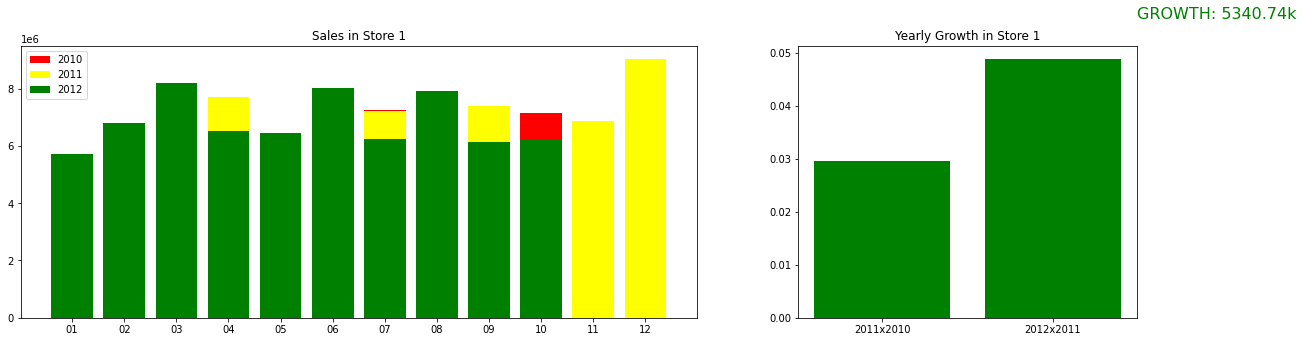

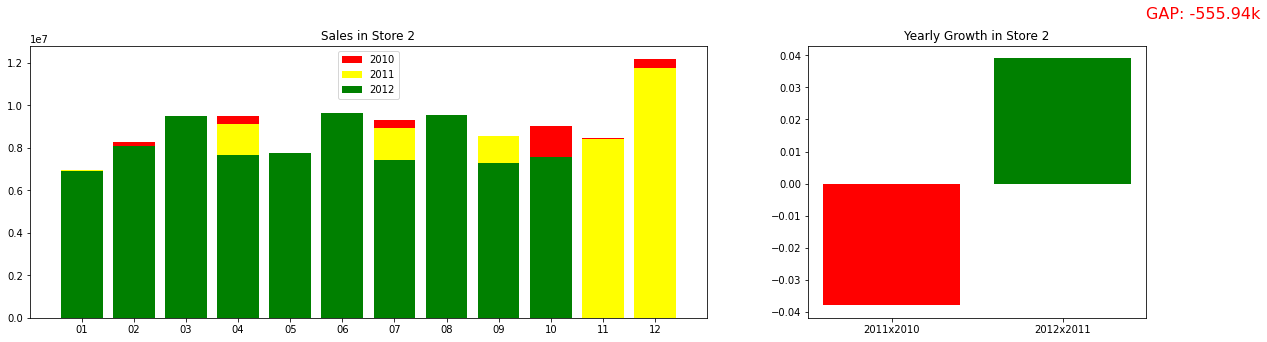

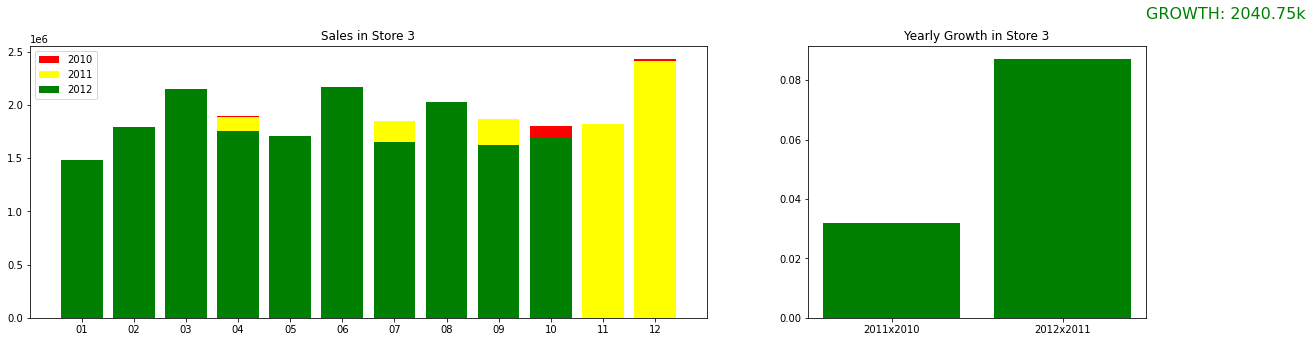

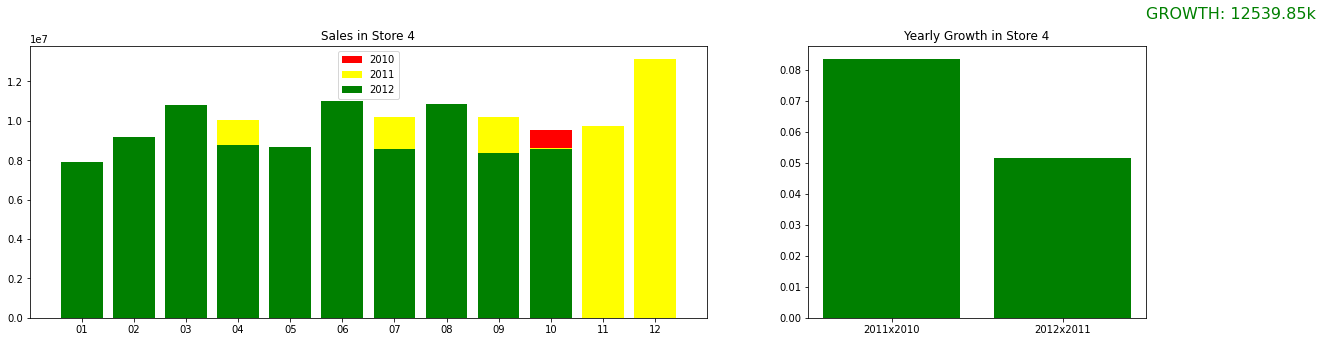

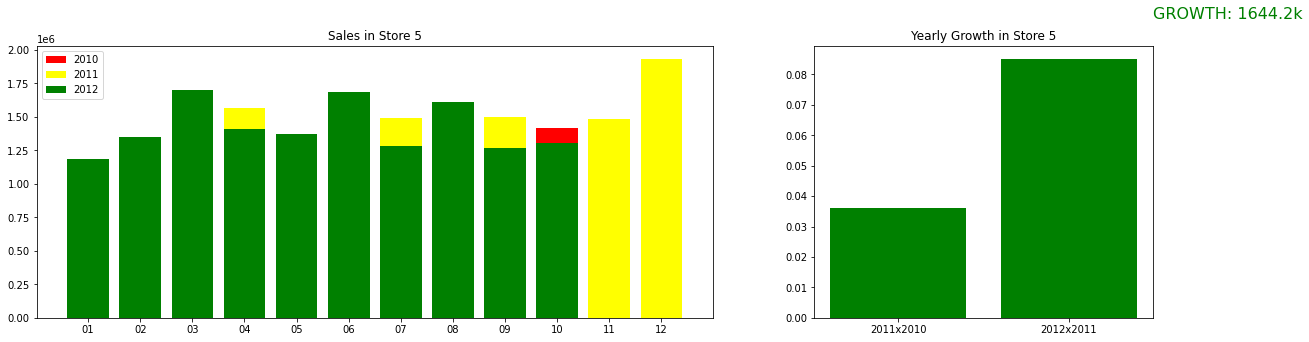

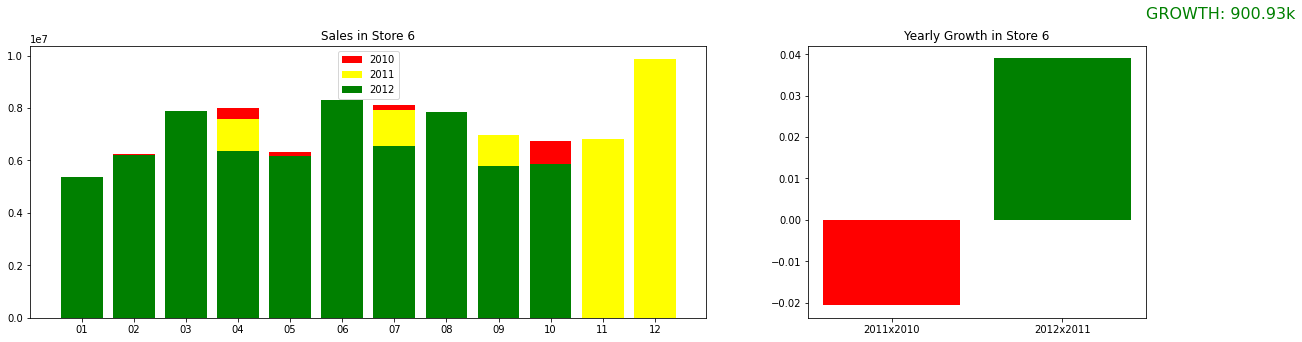

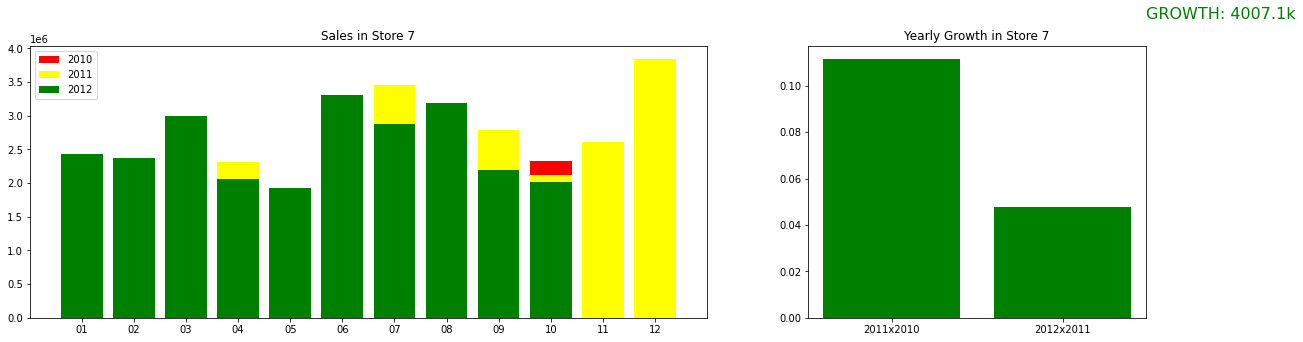

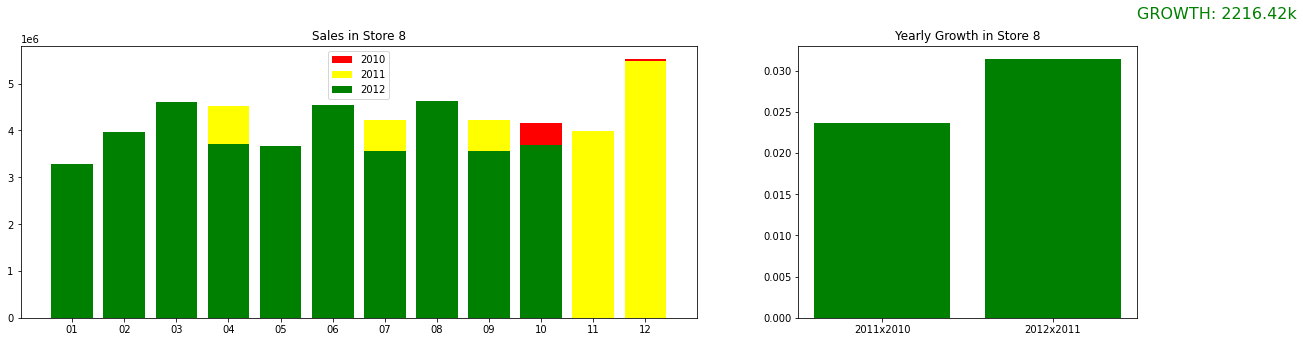

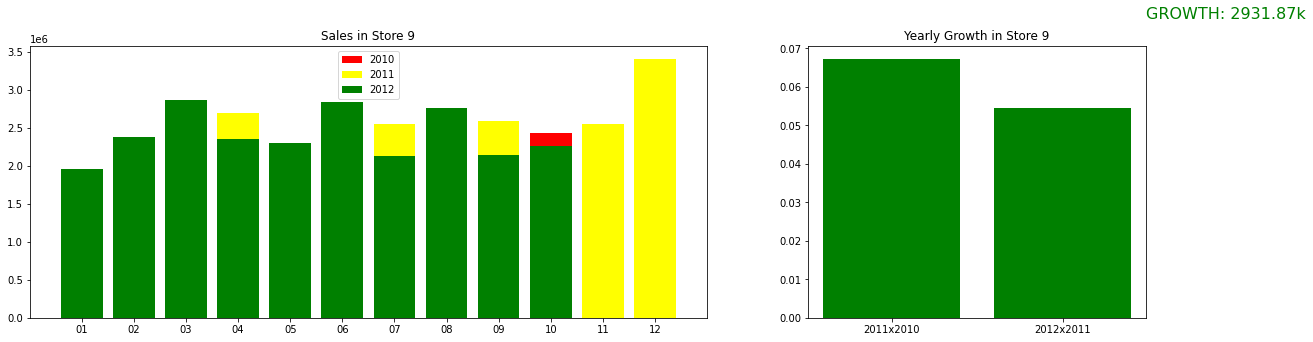

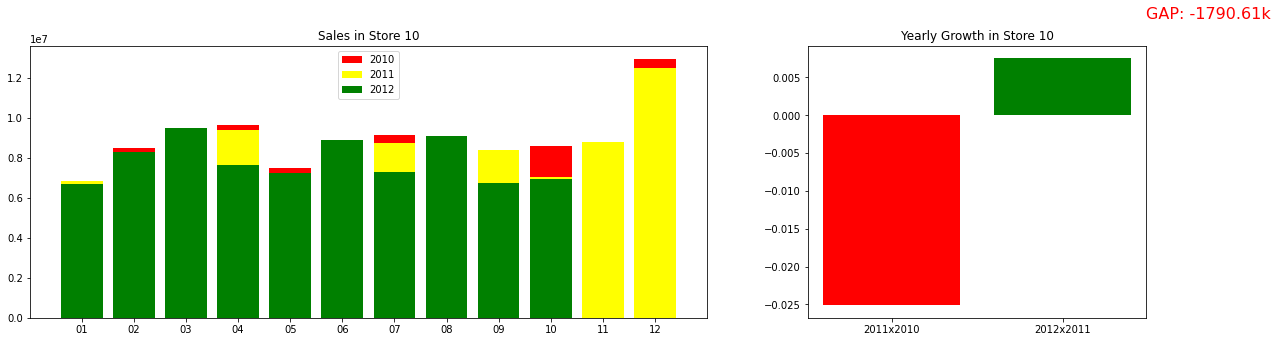

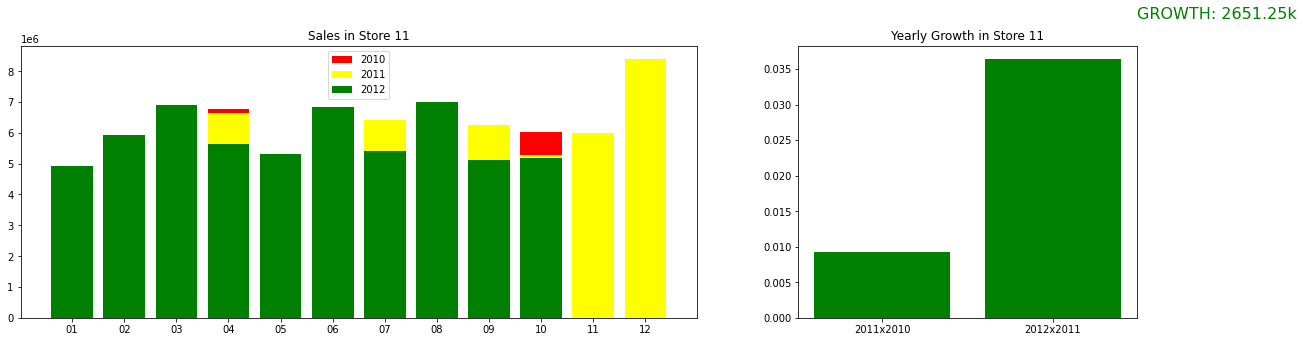

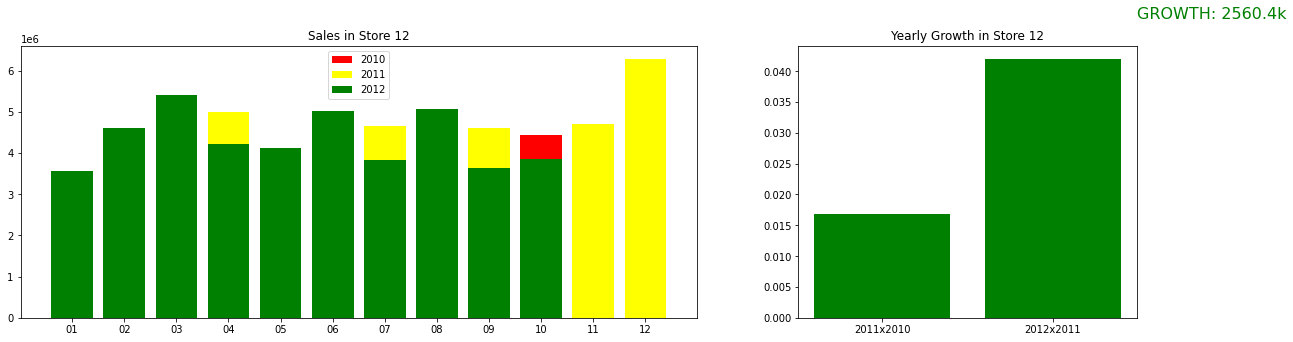

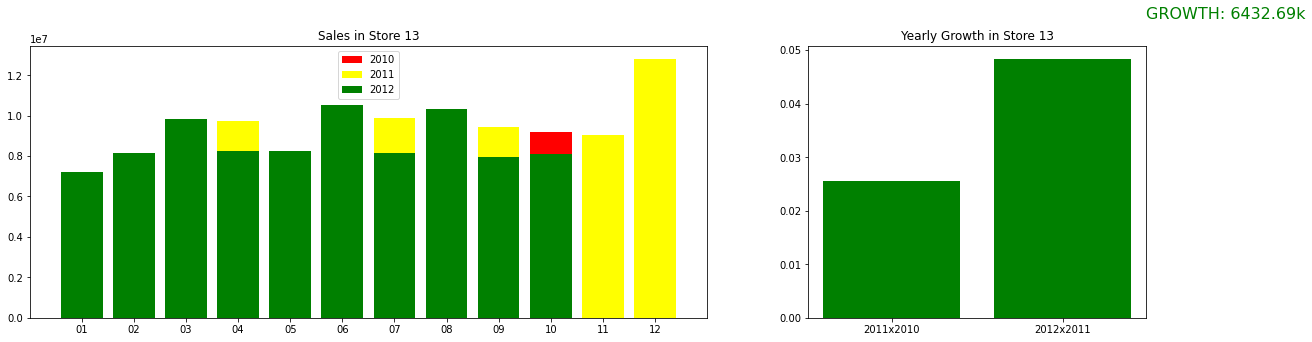

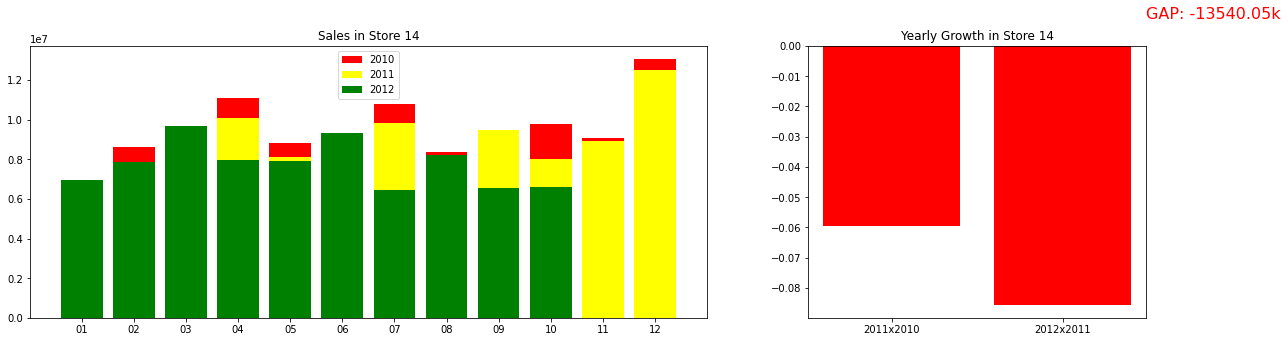

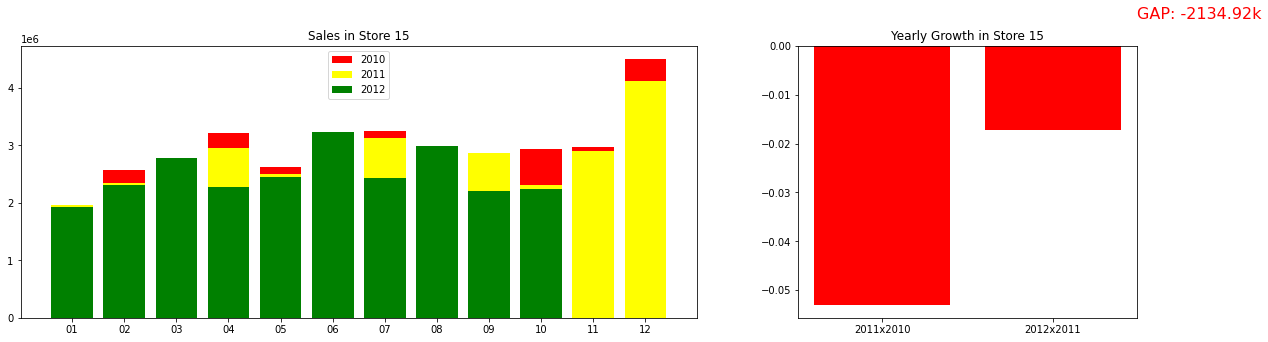

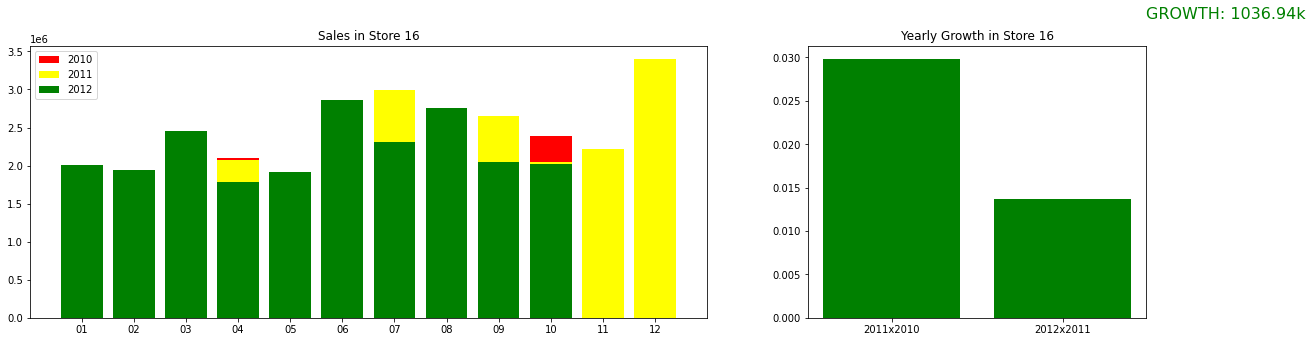

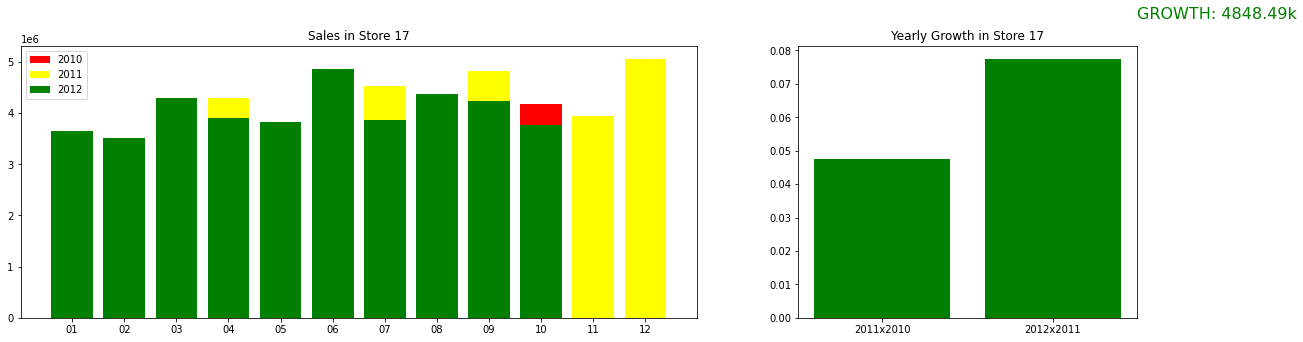

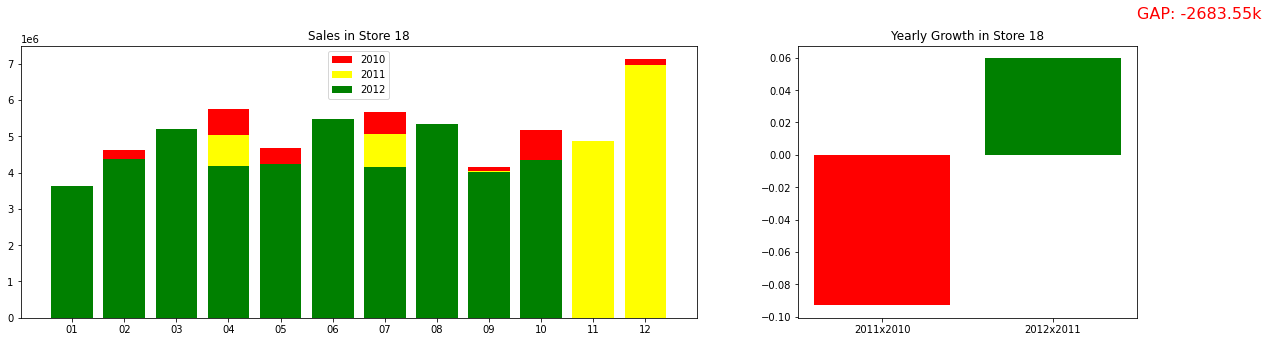

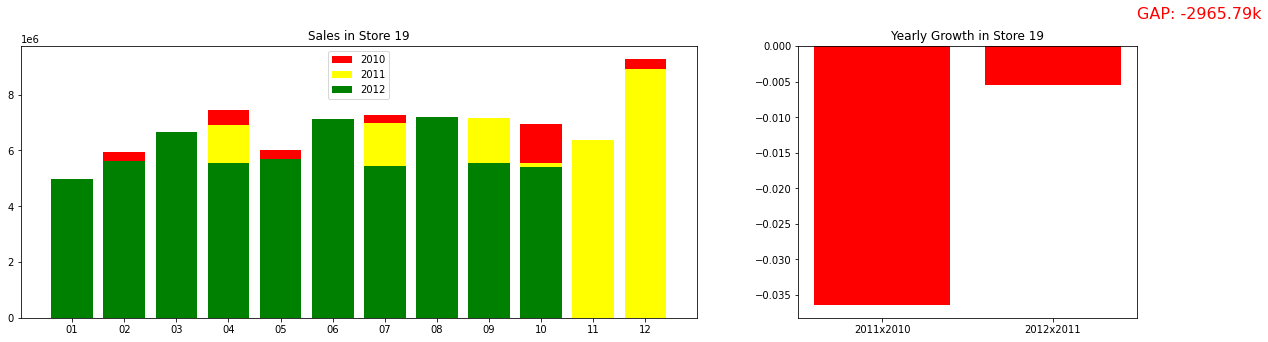

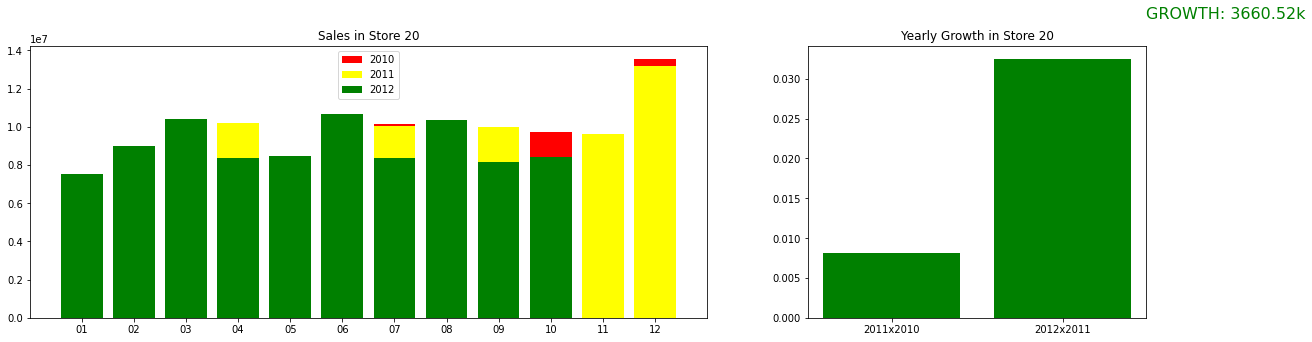

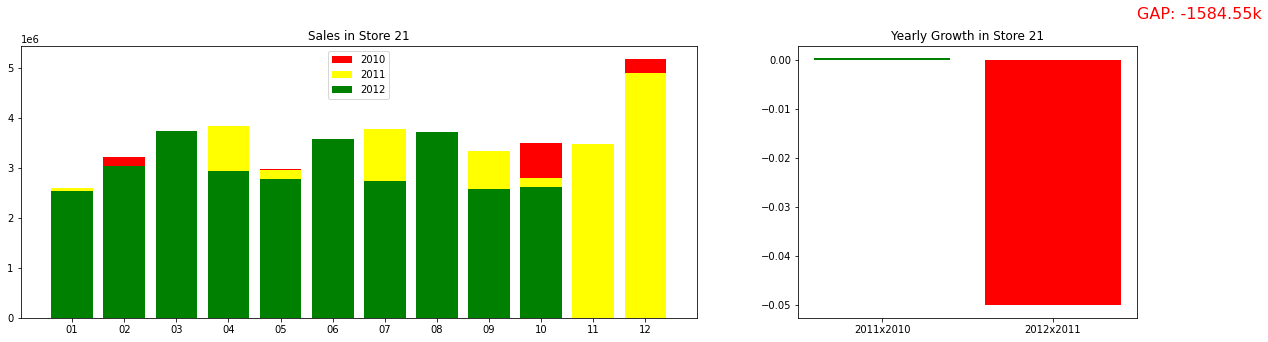

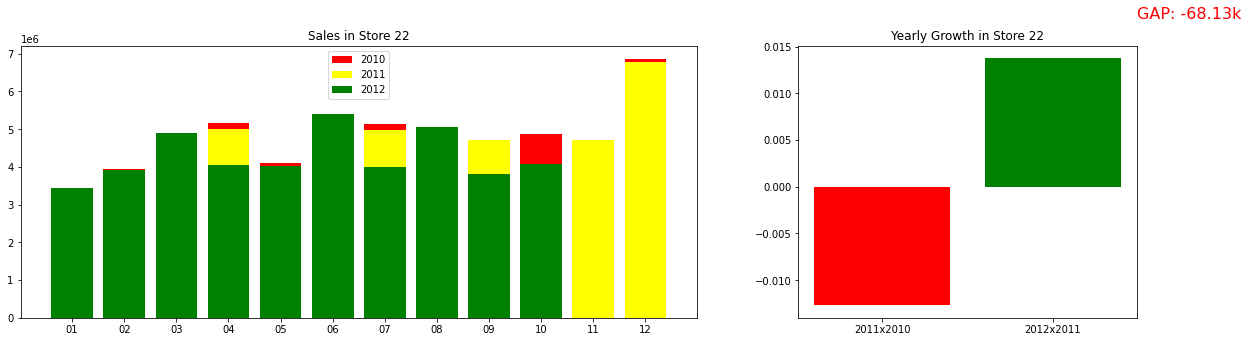

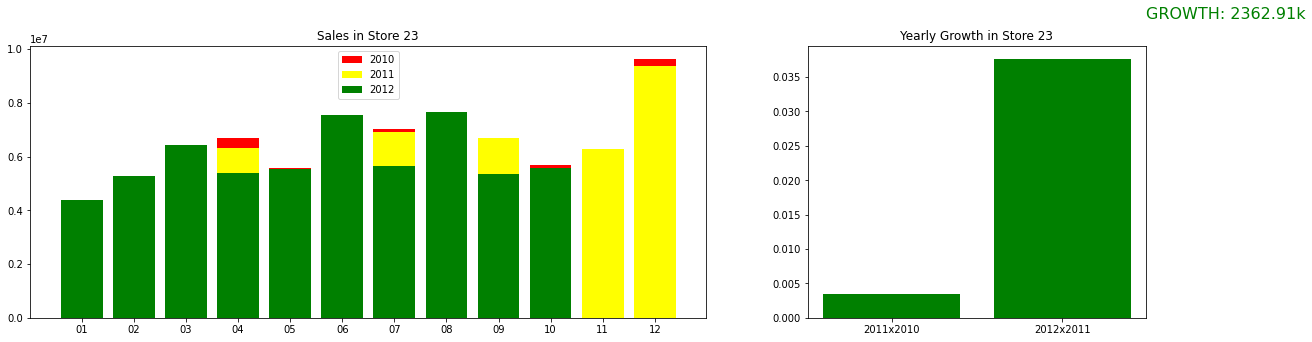

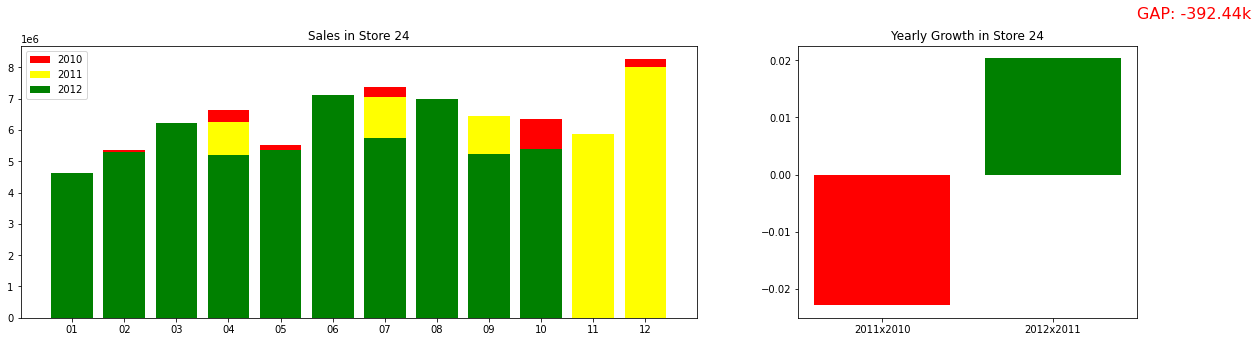

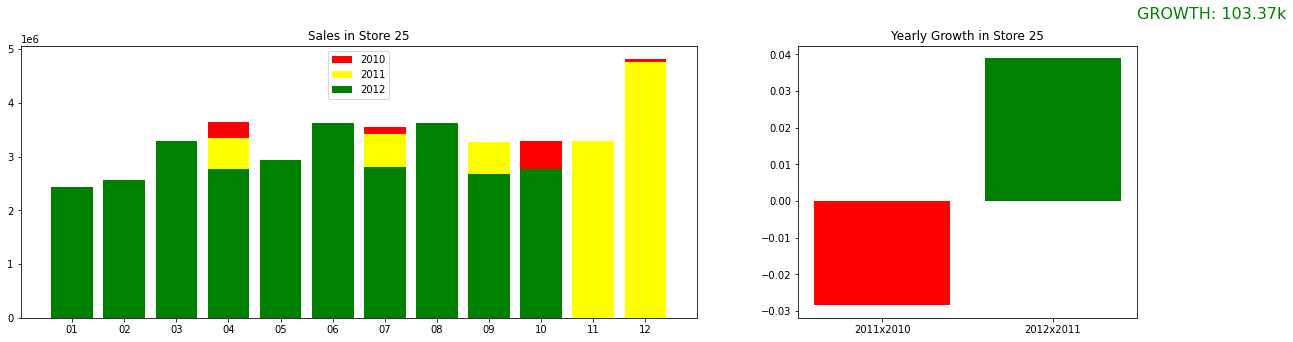

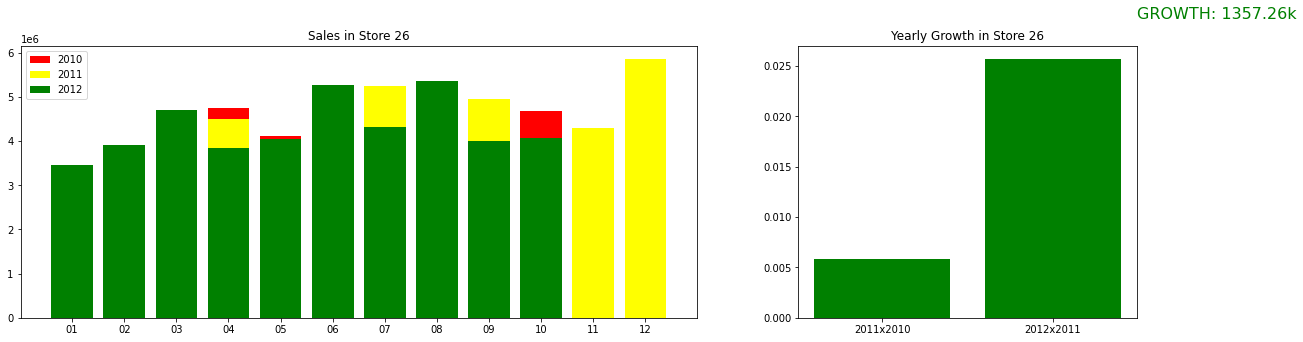

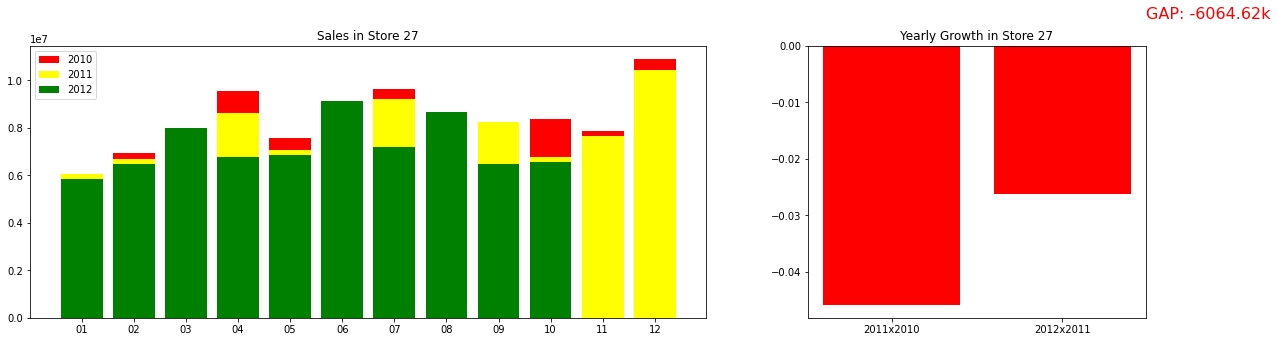

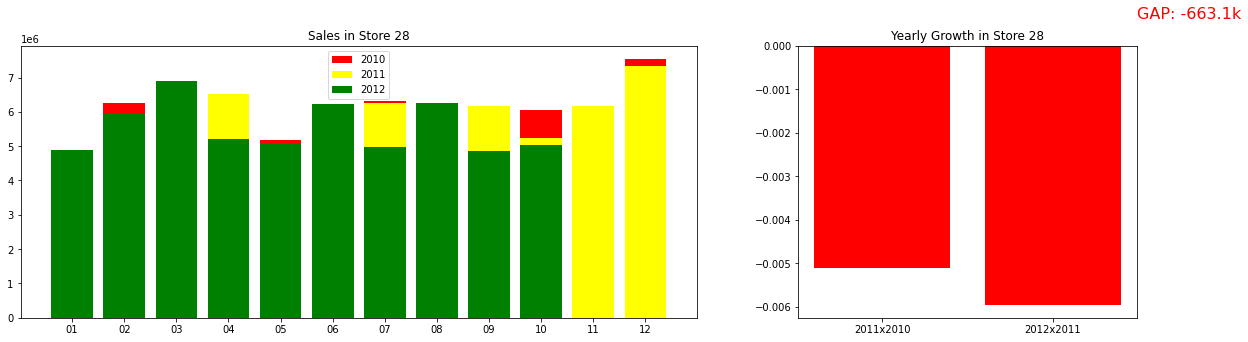

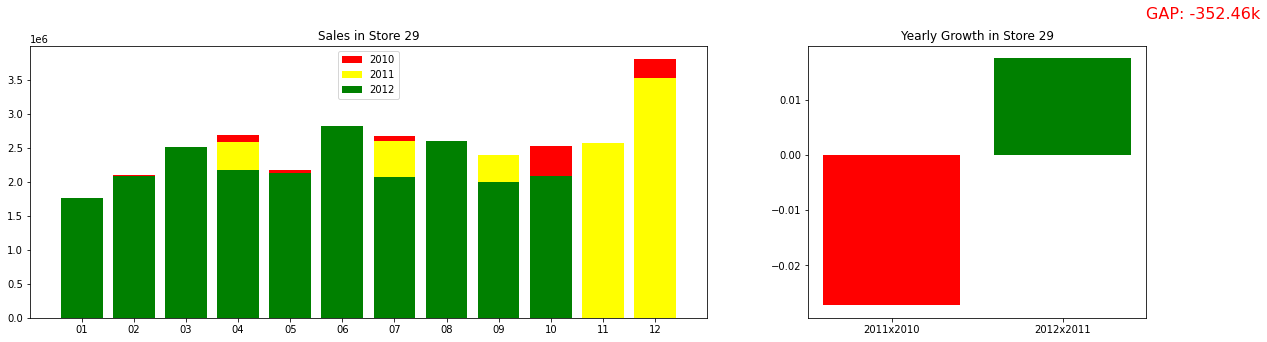

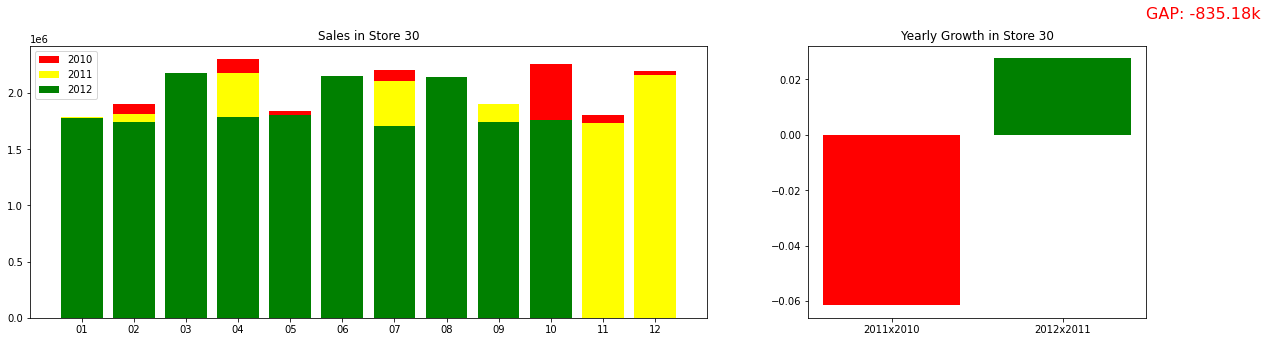

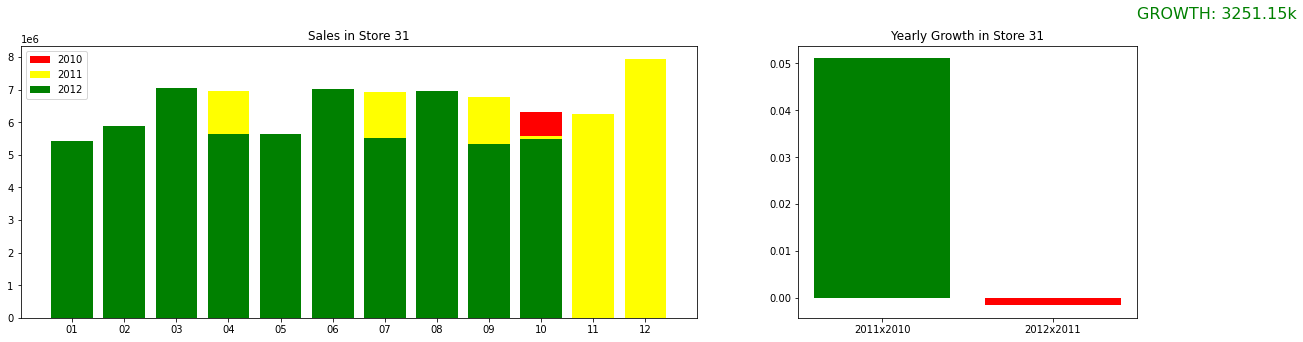

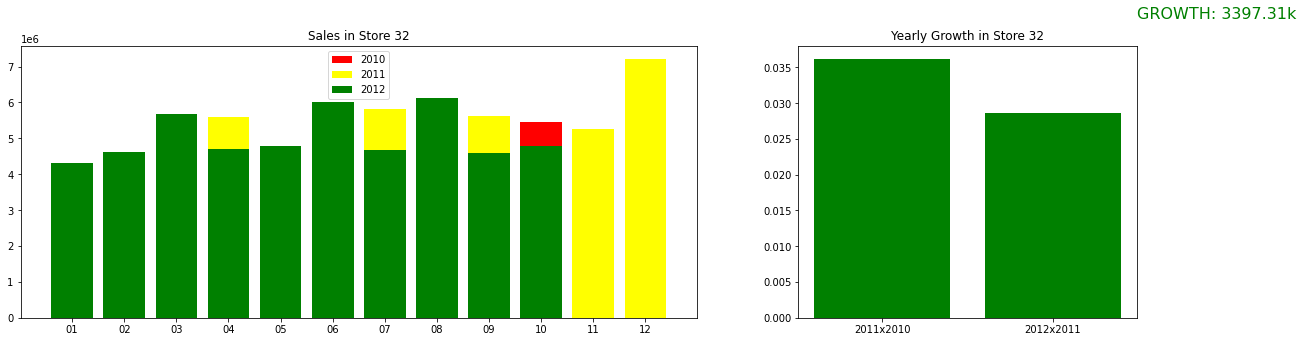

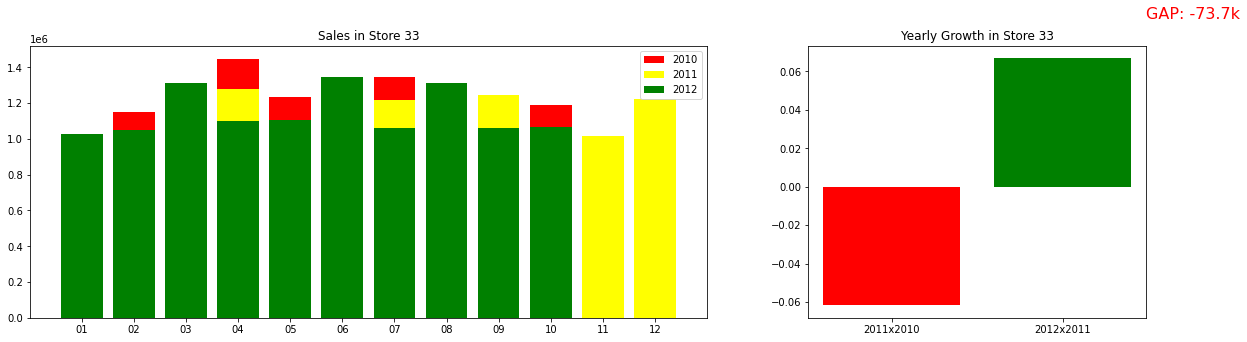

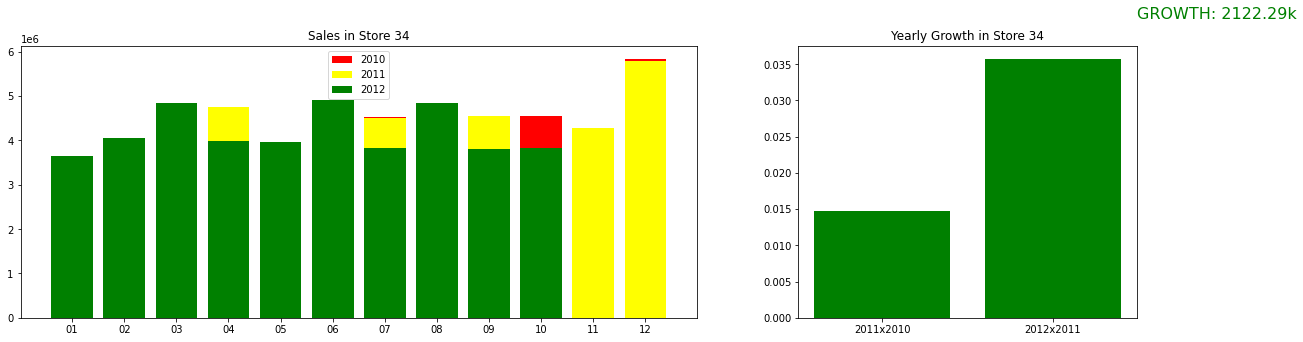

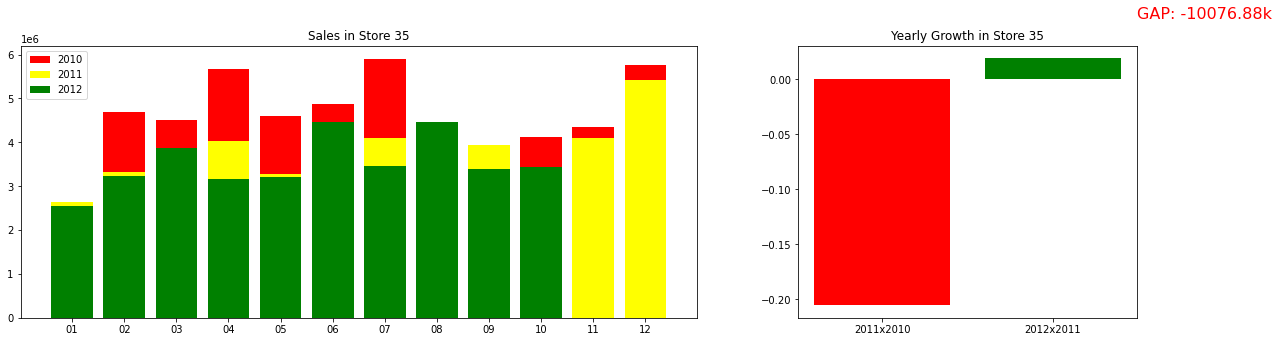

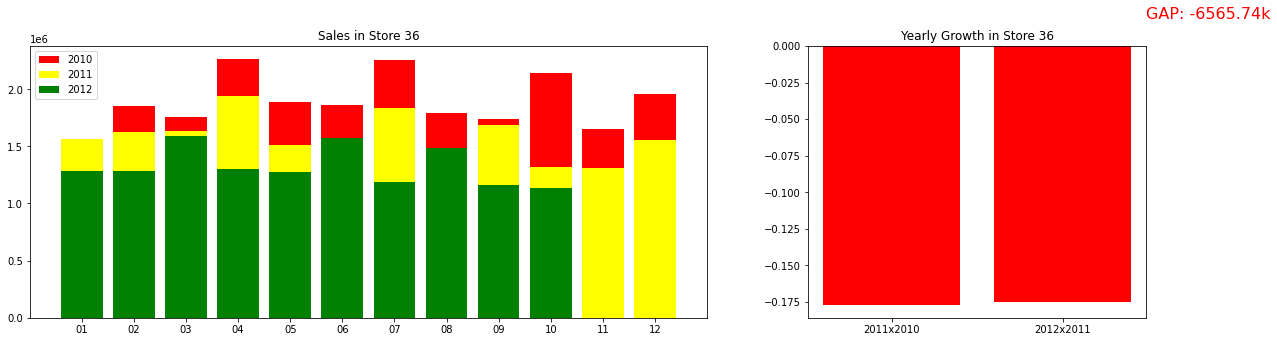

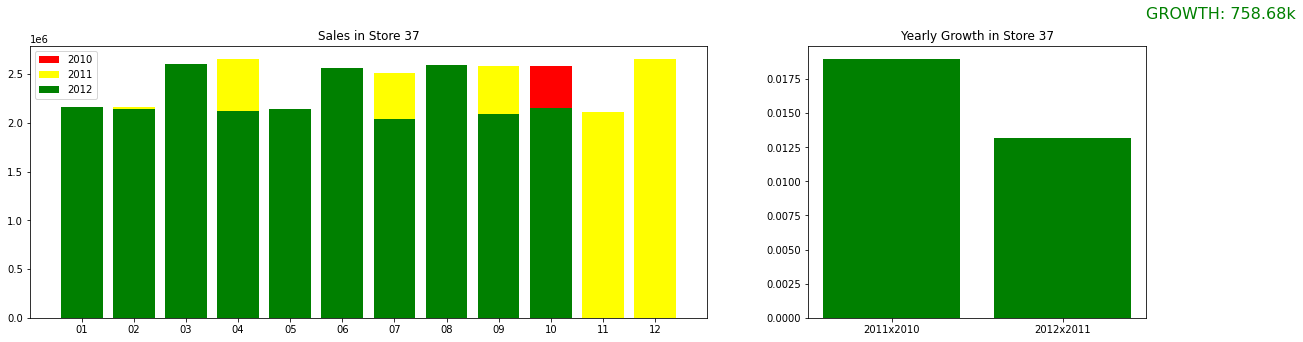

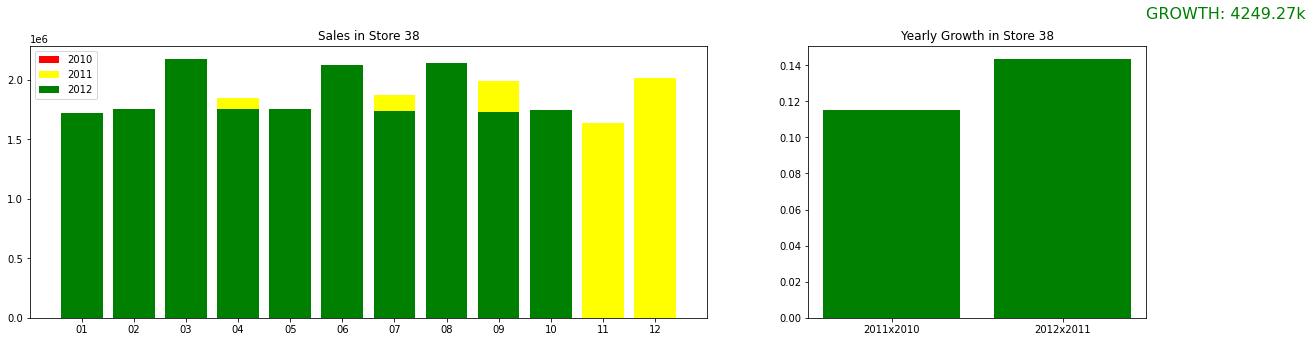

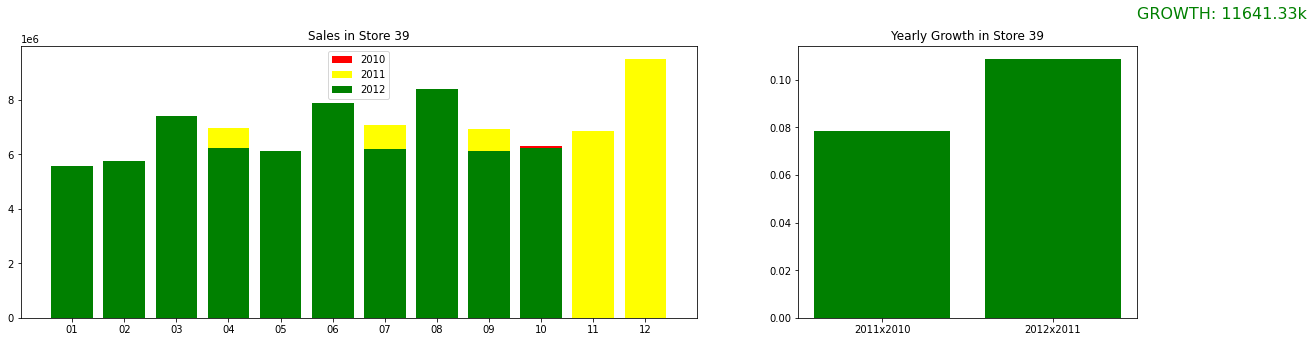

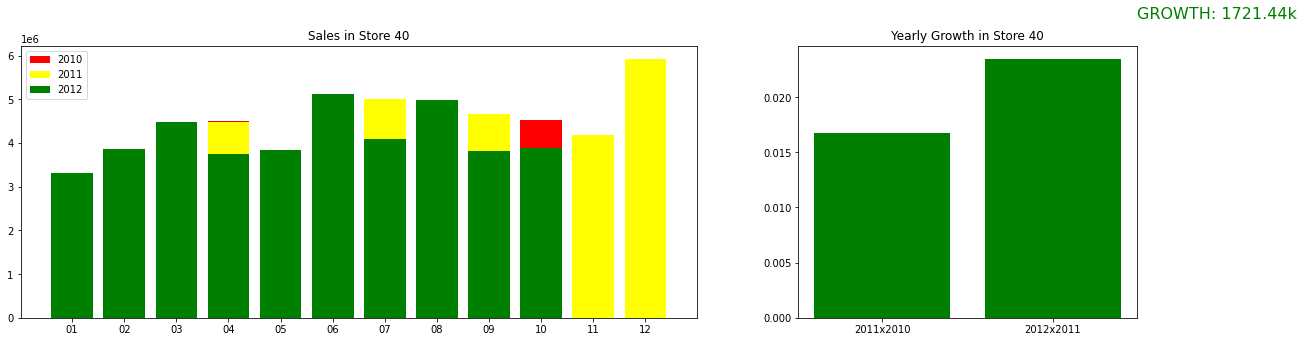

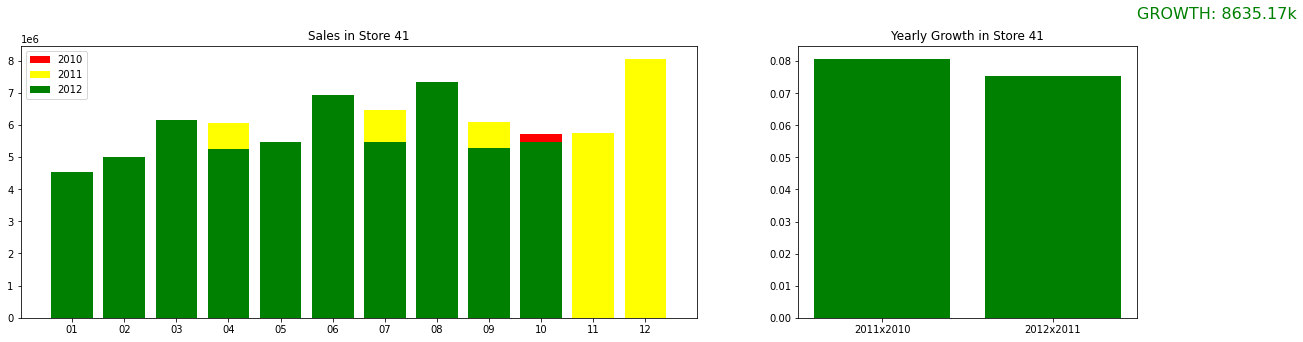

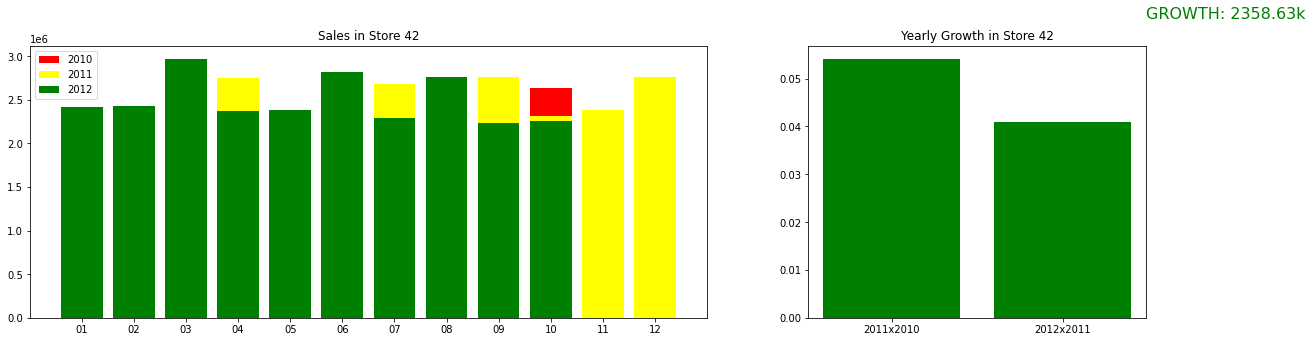

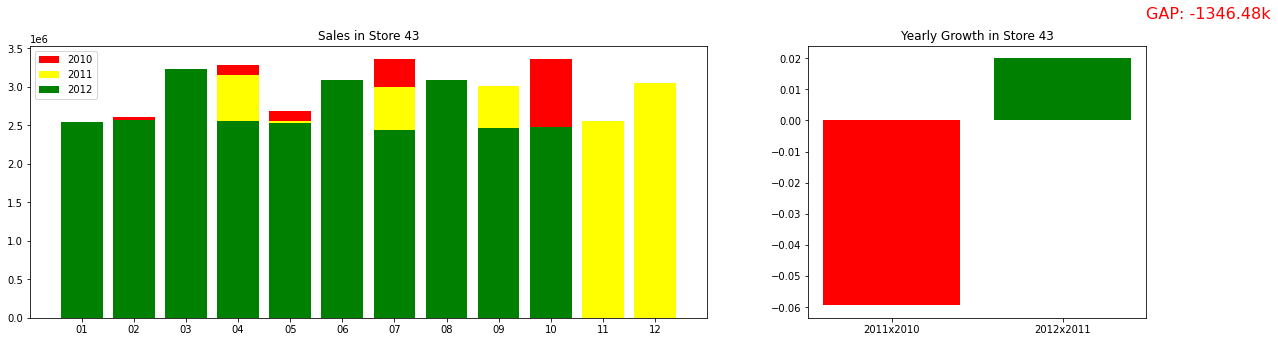

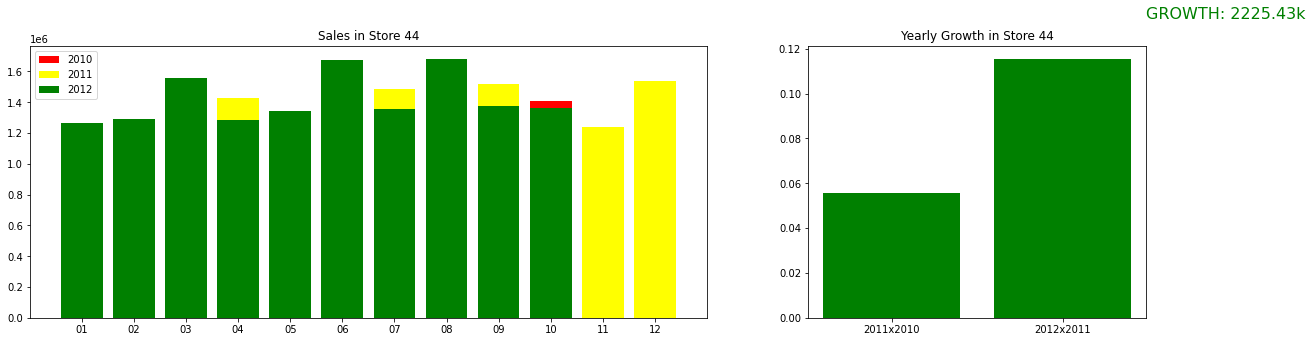

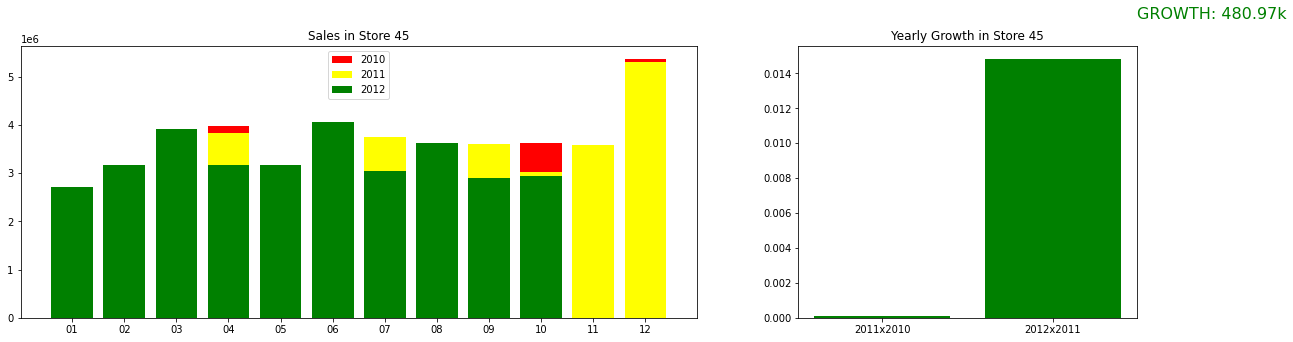

In [15]:
stores = df['Store'].unique()
for store in stores:
    g1,g2,si = get_growth(df_month,store)
    get_chart(df_month,store,g1,g2,si)

> Os gráficos de somatório de vendas ao longo dos meses, demonstra que apesar do grande volume de venda nos eventos promocionais, os meses que não possuem eventos apresentam em seu somatório valor de venda consistente durante o ano. <br>
Sendo assim, optamos em manter todas as vendas para as análises seguintes.

In [18]:
#Selecionando lojas que apresentaram maior incremento em vendas em meses comparaveis em relação ao ano interior
stores = df['Store'].unique()

growth = pd.DataFrame({'Store':[],'Sales_Growth':[],'G1':[],'G2':[]})
for store in stores:
    g1,g2,si = get_growth(df_month,store)
    g = pd.DataFrame({'Store':[store],'Sales_Growth':[si],'G1':[g1],'G2':[g2]})
    growth = growth.append(g)

growth.sort_values(['Sales_Growth'],ascending=False).head(5)

,Store,Sales_Growth,G1,G2
0,4.0,12539846.61,0.083436,0.051654
0,39.0,11641329.28,0.078677,0.108814
0,41.0,8635166.16,0.080657,0.075188
0,13.0,6432686.50,0.025549,0.048346
0,1.0,5340742.59,0.029518,0.048869


> A partir da observação dos gráficos acima e estabelecendo como critério de seleção para investimento:

- Lojas que apresentaram crescimento em vendas em relação ao ano anterior em meses com dados nos dois períodos comparáveis disponíveis (2011 x 2010, 2012 x 2011);
- Lojas que apresentaram o maior incremento em valor de vendas nestes periodos.


 *Selecionamos as lojas **4, 39, 41, 13 e 1** como candidatas a expansão.*

### Correlação entre vendas e demais variáveis, para cada uma das lojas selecionadas

In [70]:
#Função para obter o DF das correlações após remoção de outliers

def get_corr(df,store):

    
    #Colunas relevantes em correlação
    df_corr = df[df['Store']==store][['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']]

    #Para cada coluna, primeiramente se calcula o Z-score de cada valor relativo a media da coluna e ao desvio padrão.
    # Daí então utiliza o Z-score absoluto, pois a direção não é relevante, somente se estivesse abaixo do limite.
    # e finalmente, o resultado da condição é usado para indicar o DF.

    df_corr[(np.abs(stats.zscore(df_corr))<3).all(axis=1)]
    # somente a correlação ao Weekly_Sales
    df_corr = df_corr.corr()['Weekly_Sales']
    # Adicionando coluna com o número da loja
    df_corr['Store']=store
    return df_corr

In [71]:
# Procurando correlações
chosen_stores = [4,39,41,13,1]
corr = pd.DataFrame()
for store in chosen_stores:
    corr = corr.append(get_corr(df,store))
    

corr = corr[['Store','Unemployment','CPI','Temperature','Fuel_Price']]
corr

,Store,Unemployment,CPI,Temperature,Fuel_Price
Weekly_Sales,4.0,-0.337221,0.351046,-0.225565,0.211158
Weekly_Sales,39.0,-0.383617,0.428019,0.064746,0.267441
Weekly_Sales,41.0,-0.349744,0.392175,0.106753,0.304833
Weekly_Sales,13.0,-0.171215,0.163874,-0.137766,0.076841
Weekly_Sales,1.0,-0.097211,0.225529,-0.222686,0.124983


> As correlações mais fortes com Weekly_Sales para as lojas finalistas são com as colunas Unemplyment e CPI. Vamos então verificar como essas variáveis se comportam para cada loja.

#### Variáveis com maior correlação para cada loja.

In [20]:
# Obtendo a média mensal de Unemployment e CPI para cada loja

#Store 39:

df.groupby(['Store','Month','Year'])['Unemployment','CPI'].mean().reset_index().sort_values(['Store','Year','Month']).query('Store==39')[['Month','Year','Unemployment','CPI']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


,Month,Year,Unemployment,CPI
1256,02,2010,8.55,209.9950
1259,03,2010,8.55,210.0050
1262,04,2010,8.46,209.3300
1265,05,2010,8.46,209.3250
1268,06,2010,8.46,210.1150
1271,07,2010,8.36,209.9680
1274,08,2010,8.36,210.3350
1277,09,2010,8.36,210.3050
1280,10,2010,8.48,210.5660
1283,11,2010,8.48,210.6650


In [21]:
#Store 41:

df.groupby(['Store','Month','Year'])['Unemployment','CPI'].mean().reset_index().sort_values(['Store','Year','Month']).query('Store==41')[['Month','Year','Unemployment','CPI']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Month,Year,Unemployment,CPI
1322,02,2010,7.54,189.4925
1325,03,2010,7.54,189.7150
1328,04,2010,7.36,189.6500
1331,05,2010,7.36,189.4850
1334,06,2010,7.36,189.4225
1337,07,2010,7.34,189.6660
1340,08,2010,7.34,190.2450
1343,09,2010,7.34,190.4500
1346,10,2010,7.51,190.8340
1349,11,2010,7.51,191.0200


In [22]:
#Store 4:

df.groupby(['Store','Month','Year'])['Unemployment','CPI'].mean().reset_index().sort_values(['Store','Year','Month']).query('Store==4')[['Month','Year','Unemployment','CPI']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Month,Year,Unemployment,CPI
101,02,2010,8.62,126.5050
104,03,2010,8.62,126.6000
107,04,2010,7.90,126.5220
110,05,2010,7.90,126.2100
113,06,2010,7.90,126.1225
116,07,2010,7.37,126.1360
119,08,2010,7.37,126.0800
122,09,2010,7.37,126.1375
125,10,2010,7.13,126.3320
128,11,2010,7.13,126.5800


In [23]:
#Store 13:

df.groupby(['Store','Month','Year'])['Unemployment','CPI'].mean().reset_index().sort_values(['Store','Year','Month']).query('Store==13')[['Month','Year','Unemployment','CPI']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Month,Year,Unemployment,CPI
398,02,2010,8.32,126.5050
401,03,2010,8.32,126.6000
404,04,2010,8.11,126.5220
407,05,2010,8.11,126.2100
410,06,2010,8.11,126.1225
413,07,2010,7.95,126.1360
416,08,2010,7.95,126.0800
419,09,2010,7.95,126.1375
422,10,2010,7.80,126.3320
425,11,2010,7.80,126.5800


In [24]:
#Store 1:

df.groupby(['Store','Month','Year'])['Unemployment','CPI'].mean().reset_index().sort_values(['Store','Year','Month']).query('Store==1')[['Month','Year','Unemployment','CPI']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Month,Year,Unemployment,CPI
2,02,2010,8.11,211.2375
5,03,2010,8.11,211.2425
8,04,2010,7.81,210.5520
11,05,2010,7.81,210.5500
14,06,2010,7.81,211.3575
17,07,2010,7.79,211.2080
20,08,2010,7.79,211.5775
23,09,2010,7.79,211.5375
26,10,2010,7.84,211.8000
29,11,2010,7.84,211.9000


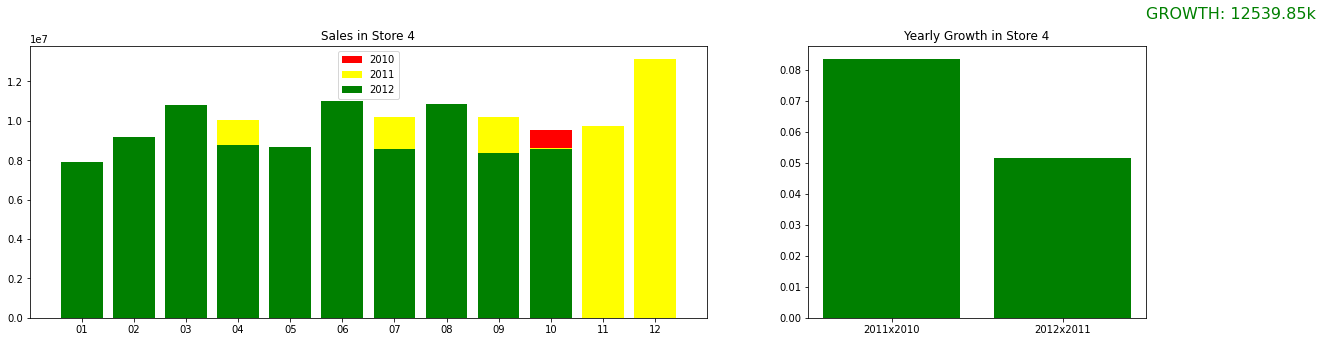

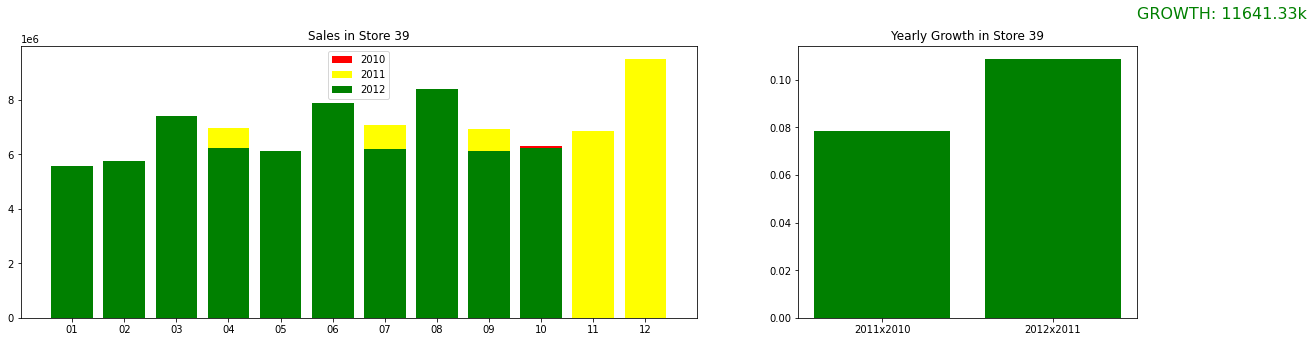

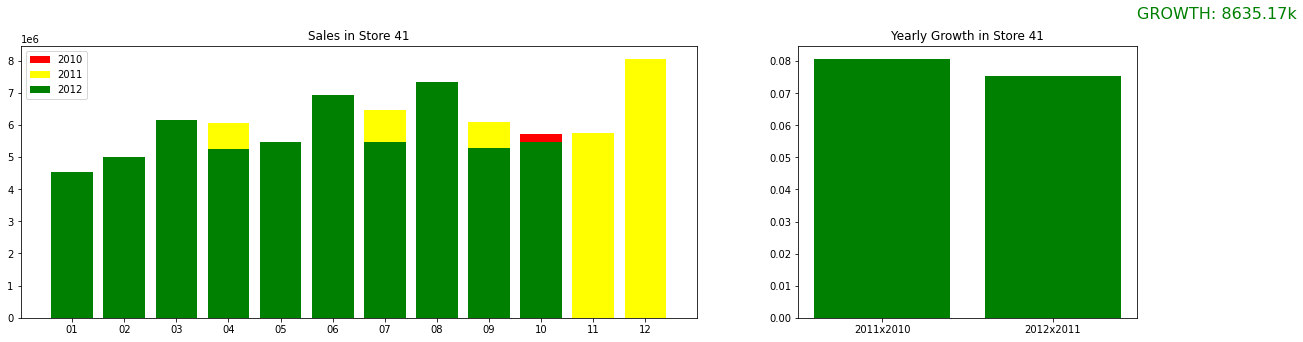

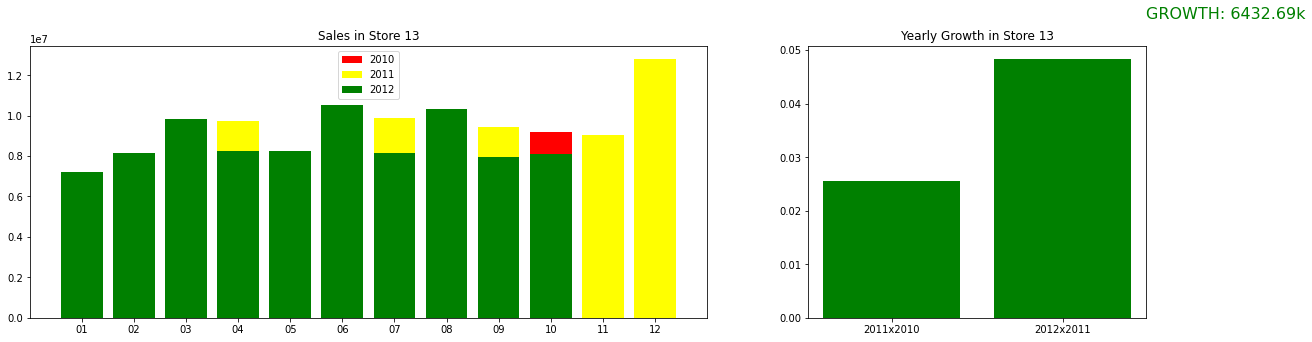

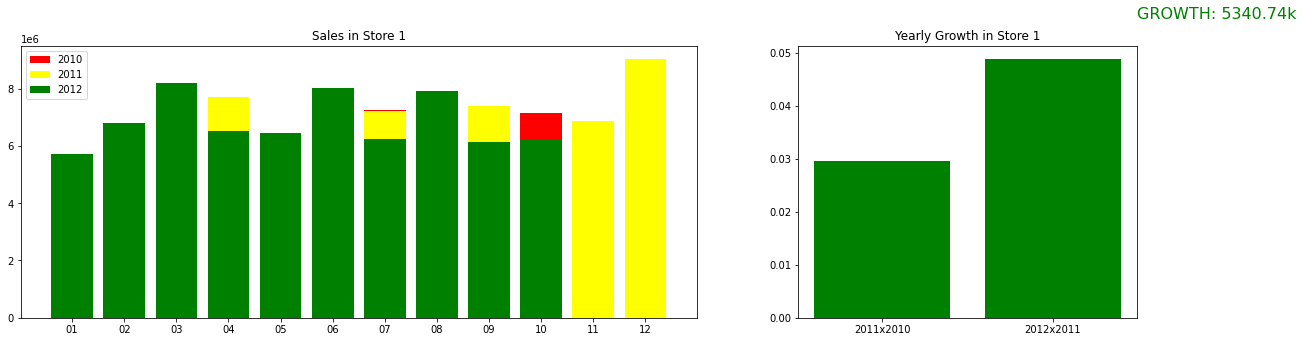

In [25]:
#Gráficos das lojas escolhidas:
for store in chosen_stores:
  g1, g2, si = get_growth(df_month,store)
  get_chart(df_month,store,g1,g2,si)

---

# CONCLUSÃO
Entre as lojas com maiores incrementos em vendas ao longo dos anos e com maiores volumes, a loja 4, além de apresentar o **maior incremento em vendas em meses comparáveis**, aprensenta a **maior queda na taxa de desemprego e a menor taxa no final do período**, variável que apresenta correlação negativa mais relevante com as vendas.

Na ausência de outras informações como o tamanho atual de cada loja e o número de funcionários, a **Loja 4** é a que apresenta as **melhores características para uma expansão**.